In [1]:
import json

# read jsonl file
path = "/mnt/ssd/Projects/lmms-eval/outputs/hrbench_intern35_2b-think-maxnewtokens8k/OpenGVLab__InternVL3_5-2B/20251001_171757_samples_hrbench4k.jsonl"
with open(path, "r") as f:
    data = [json.loads(line) for line in f]

print(data[:5])  # print first 5 entries

[{'doc_id': 0, 'target': 'A', 'filtered_resps': ['<think>\nOkay, let\'s see. The question is asking what number is displayed above the entrance where the woman is standing. The options are A. 27B, B. 37B, C. 27D, D. 27E.\n\nFirst, I need to look at the image provided. The woman is standing in front of a door with the number 27B above it. The door has a sign that says "27B". The entrance is a staircase leading down, and the door is part of a building. The woman is holding a phone and touching the wall next to the door. \n\nWait, the question is about the number displayed above the entrance. The entrance here is the door with the staircase. The sign above the door is "27B". So the answer should be A. 27B. But let me check again to make sure I didn\'t miss anything.\n\nLooking at the image again: the door has a blue sign with white numbers "27B". The wall around the door is peeling, and there\'s a mailbox on the right side. The woman is standing in front of the door, looking to the side. 

In [2]:
# Reorganize the data entries
reorganized_data = {0: [], 1: []}
for e in data:
    score = e["average"]["gpt_score"]
    reorganized_data[score].append(
        {
            "question": e["input"],
            "target": e["target"],
            "response": e["filtered_resps"][0],
        }
    )

print(reorganized_data[0][0])  # print first entry of score 0

{'question': 'Is the mailbox on the left or right side of the woman?\nA. Right\nB. Directly above\nC. In front\nD. Left\n', 'target': 'A', 'response': '<think>\nOkay, let\'s see. The question is asking whether the mailbox is on the left or right side of the woman in the image. The options are A. Right, B. Directly above, C. In front, D. Left.\n\nFirst, I need to visualize the image. The woman is standing in front of a staircase, holding a phone and touching a wall. The mailbox is on the right side of her. Wait, the question is about the mailbox\'s position relative to the woman.\n\nWait, the mailbox is on the right side of the image. The woman is on the left side of the image. So the mailbox is to the right of the woman. But the options are left or right. Wait, the answer options are A. Right, D. Left. So the mailbox is on the right side of the woman, so the answer would be A. Right. But let me check again.\n\nWait, the woman is on the left side of the image. The mailbox is on the righ

In [3]:
print(len(reorganized_data[0]), len(reorganized_data[1]))  # print lengths of both lists

531 269


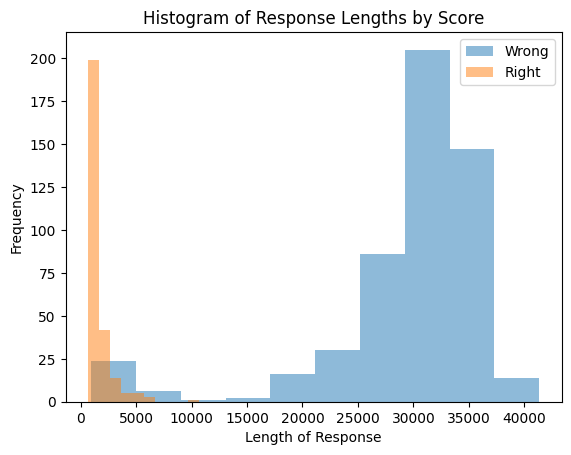

In [5]:
# Plot histogram of lengths of responses for both scores
import matplotlib.pyplot as plt

lengths_0 = [len(r["response"]) for r in reorganized_data[0]]
lengths_1 = [len(r["response"]) for r in reorganized_data[1]]  # assuming response is a string
plt.hist(lengths_0, alpha=0.5, label="Wrong")
plt.hist(lengths_1, alpha=0.5, label="Right")
plt.legend(loc="upper right")
plt.xlabel("Length of Response")
plt.ylabel("Frequency")
plt.title("Histogram of Response Lengths by Score")
plt.show()